In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run this command to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the cleaned csv
cleaned = pd.read_csv('Data/cleaned_transport.csv')
cleaned

,MSOA,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,on_foot_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,E02000001,30.604333,14.649948,18.390805,5.433647,5.538140,5.078370,45.642633,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389,3.051202
1,E02000002,62.403244,6.400966,15.660225,8.212560,14.734300,1.328502,4.669887,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498,46.819646
2,E02000003,68.805425,6.895792,12.778145,19.850187,10.619079,0.881251,5.904384,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000,41.440846
3,E02000004,76.013805,6.368090,10.146956,13.750875,9.972008,1.329601,6.752974,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777,49.475157
4,E02000005,66.069746,6.286509,12.406120,12.294854,15.076495,1.585535,5.535466,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473,45.201669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,78.594455,8.073744,0.021191,1.292647,3.390549,2.564103,9.557110,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590,72.981564
7197,W02000420,89.725659,13.338290,0.148699,0.832714,3.568773,1.501859,4.014870,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617,75.375465
7198,W02000421,89.238114,24.655573,0.107354,0.339953,1.789229,0.984076,4.007873,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360,66.935051
7199,W02000422,82.430213,6.057363,0.064212,4.965753,8.005137,3.381849,18.857021,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943,57.448630


In [3]:
# replace all NA values with 0
cleaned.fillna(0, inplace=True)

In [4]:
# keep only numeric columns (remove MSOA column)
numeric_cleaned = cleaned.select_dtypes('number')
numeric_cleaned

,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,on_foot_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,30.604333,14.649948,18.390805,5.433647,5.538140,5.078370,45.642633,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389,3.051202
1,62.403244,6.400966,15.660225,8.212560,14.734300,1.328502,4.669887,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498,46.819646
2,68.805425,6.895792,12.778145,19.850187,10.619079,0.881251,5.904384,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000,41.440846
3,76.013805,6.368090,10.146956,13.750875,9.972008,1.329601,6.752974,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777,49.475157
4,66.069746,6.286509,12.406120,12.294854,15.076495,1.585535,5.535466,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473,45.201669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,78.594455,8.073744,0.021191,1.292647,3.390549,2.564103,9.557110,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590,72.981564
7197,89.725659,13.338290,0.148699,0.832714,3.568773,1.501859,4.014870,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617,75.375465
7198,89.238114,24.655573,0.107354,0.339953,1.789229,0.984076,4.007873,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360,66.935051
7199,82.430213,6.057363,0.064212,4.965753,8.005137,3.381849,18.857021,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943,57.448630


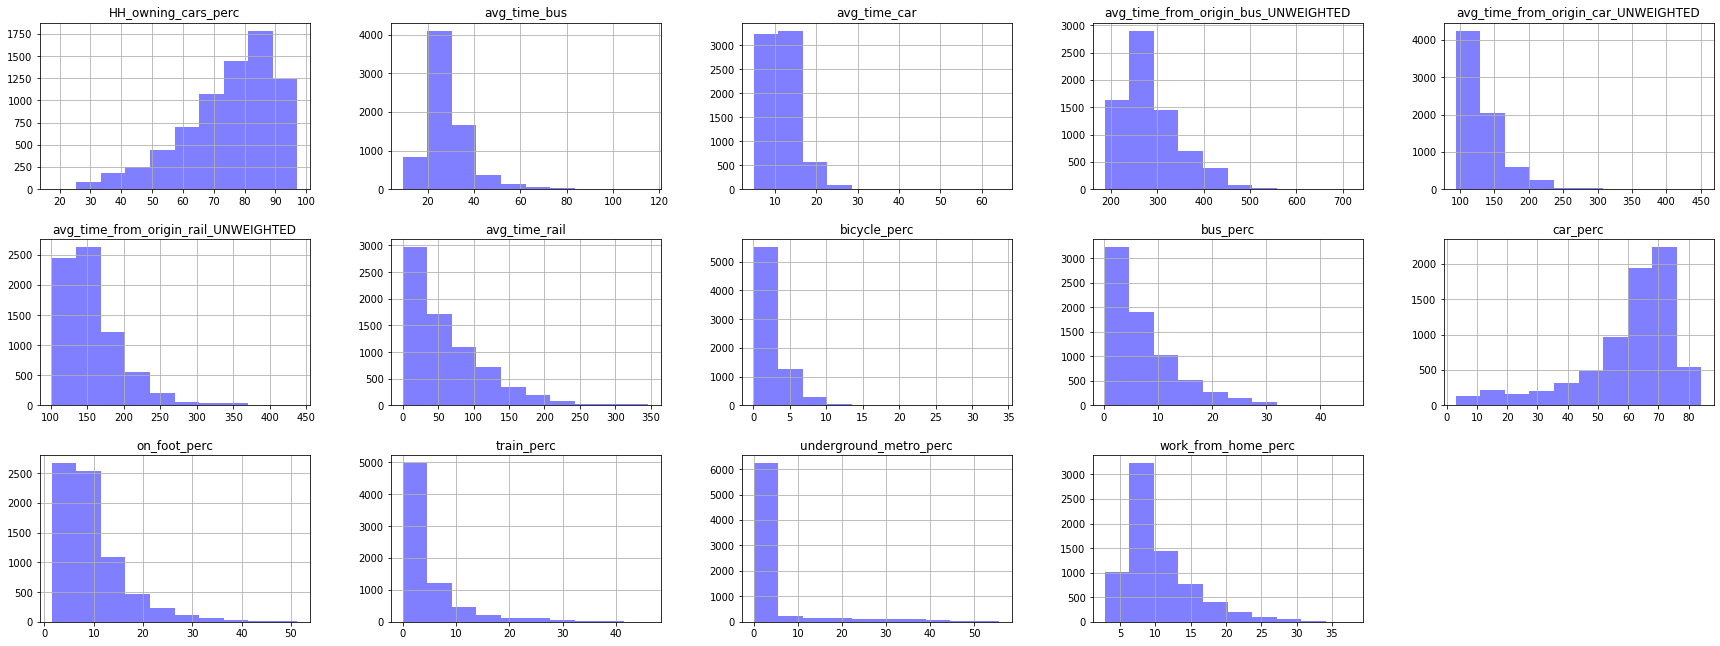

In [5]:
#plot the numeric columns
numeric_cleaned.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

In [6]:
# describe columns
#numeric_cleaned['avg_time_from_origin_bus_UNWEIGHTED'].describe()

The Data is Skewed. We need to transform it. Here we will do a BoxCox Transformation

In [7]:
from sklearn import preprocessing

In [8]:
# get the columns - to paste into next cell
numeric_cleaned.columns

Index(['HH_owning_cars_perc', 'work_from_home_perc', 'underground_metro_perc',
       'train_perc', 'bus_perc', 'bicycle_perc', 'on_foot_perc',
       'avg_time_from_origin_car_UNWEIGHTED', 'avg_time_car',
       'avg_time_from_origin_bus_UNWEIGHTED', 'avg_time_bus',
       'avg_time_from_origin_rail_UNWEIGHTED', 'avg_time_rail', 'car_perc'],
      dtype='object')

In [9]:
# ERROR WITH TRANSFORMATION (https://github.com/scikit-learn/scikit-learn/issues/14959)

#pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
#cols=['avg_time_from_origin_car_UNWEIGHTED', 'avg_time_from_origin_bus_UNWEIGHTED',
#      'avg_time_from_origin_rail_UNWEIGHTED']


# transform the columns
#mat = pt.fit_transform(numeric_cleaned[cols])
# show the first five rows of the array
#mat[:5]

BoxCox can only support positive numbers but yeo-johnson supports 0 and negative values. We have a lot of ) values
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html

In [10]:
# # pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # support only positive value
# pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
# cols=['Bus_stops', 'Train_stations', 'metro_stations', 'HH_owning_cars_perc',
#        'work_from_home_perc', 'underground_metro_perc', 'train_perc',
#        'bus_perc', 'taxi_perc', 'motorcycle_perc', 'bicycle_perc',
#        'on_foot_perc', 'other_perc', 'avg_time_from_origin_car_UNWEIGHTED',
#        'avg_time_car', 'avg_time_from_origin_bus_UNWEIGHTED', 'avg_time_bus',
#        'avg_time_from_origin_rail_UNWEIGHTED', 'avg_time_rail', 'car_perc']


# # transform the columns
# mat = pt.fit_transform(numeric_cleaned[cols])
# # show the first five rows of the array
# mat[:5]

## In Case using a subset of variables: (if not then run above cell instead)

In [11]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
cols = ['HH_owning_cars_perc', 'work_from_home_perc', 'underground_metro_perc', 'train_perc',
        'bus_perc', 'bicycle_perc', 'on_foot_perc', 'avg_time_from_origin_car_UNWEIGHTED',
        'avg_time_car', 'avg_time_from_origin_bus_UNWEIGHTED', 'avg_time_bus',
        'avg_time_from_origin_rail_UNWEIGHTED', 'avg_time_rail', 'car_perc']


# transform the columns
mat = pt.fit_transform(numeric_cleaned[cols])
# show the first five rows of the array
mat[:5]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[5.65176035e+03, 1.21339329e+00, 6.43443369e-01, 1.28510096e+00,
        1.76540729e+00, 1.08296334e+00, 2.16889346e+00, 8.02418385e-02,
        9.25895652e-01, 8.02418385e-02, 1.62805888e+00, 8.02418385e-02,
        4.53905407e+00, 1.35296735e+01],
       [3.97051221e+04, 1.07179966e+00, 6.41653942e-01, 1.43569119e+00,
        2.51858208e+00, 6.56874415e-01, 1.31832062e+00, 8.02418385e-02,
        8.92619624e-01, 8.02418385e-02, 1.73363464e+00, 8.02418385e-02,
        6.70458650e+00, 7.57701299e+03],
       [5.19789451e+04, 1.08720025e+00, 6.38737836e-01, 1.70344859e+00,
        2.26349381e+00, 5.22238225e-01, 1.42537951e+00, 8.02418385e-02,
        8.87399375e-01, 8.02418385e-02, 1.73532260e+00, 8.02418385e-02,
        6.69685069e+00, 5.58776201e+03],
       [6.84436258e+04, 1.07071415e+00, 6.34302491e-01, 1.60125528e+00,
        2.21470513e+00, 6.57152781e-01, 1.48517799e+00, 8.02418385e-02,
        8.90931718e-01, 8.02418385e-02, 1.69542437e+00, 8.02418385e-02,
        6.394

In [12]:
# create column names to append to these transformed columns
yj_cols = [f'yj_{c}' for c in cols]   # yj for yeo-johnson
yj_cols

['yj_HH_owning_cars_perc',
 'yj_work_from_home_perc',
 'yj_underground_metro_perc',
 'yj_train_perc',
 'yj_bus_perc',
 'yj_bicycle_perc',
 'yj_on_foot_perc',
 'yj_avg_time_from_origin_car_UNWEIGHTED',
 'yj_avg_time_car',
 'yj_avg_time_from_origin_bus_UNWEIGHTED',
 'yj_avg_time_bus',
 'yj_avg_time_from_origin_rail_UNWEIGHTED',
 'yj_avg_time_rail',
 'yj_car_perc']

In [13]:
# convert np array to df
yj_transformed = pd.DataFrame(mat, columns=yj_cols)
yj_transformed.head()

,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,5651.760355,1.213393,0.643443,1.285101,1.765407,1.082963,2.168893,0.080242,0.925896,0.080242,1.628059,0.080242,4.539054,13.529673
1,39705.122052,1.071800,0.641654,1.435691,2.518582,0.656874,1.318321,0.080242,0.892620,0.080242,1.733635,0.080242,6.704587,7577.012991
2,51978.945107,1.087200,0.638738,1.703449,2.263494,0.522238,1.425380,0.080242,0.887399,0.080242,1.735323,0.080242,6.696851,5587.762008
3,68443.625830,1.070714,0.634302,1.601255,2.214705,0.657153,1.485178,0.080242,0.890932,0.080242,1.695424,0.080242,6.394906,8697.620729
4,46474.105783,1.067985,0.638243,1.567505,2.536489,0.716695,1.396237,0.080242,0.883316,0.080242,1.718270,0.080242,6.526319,6939.792089


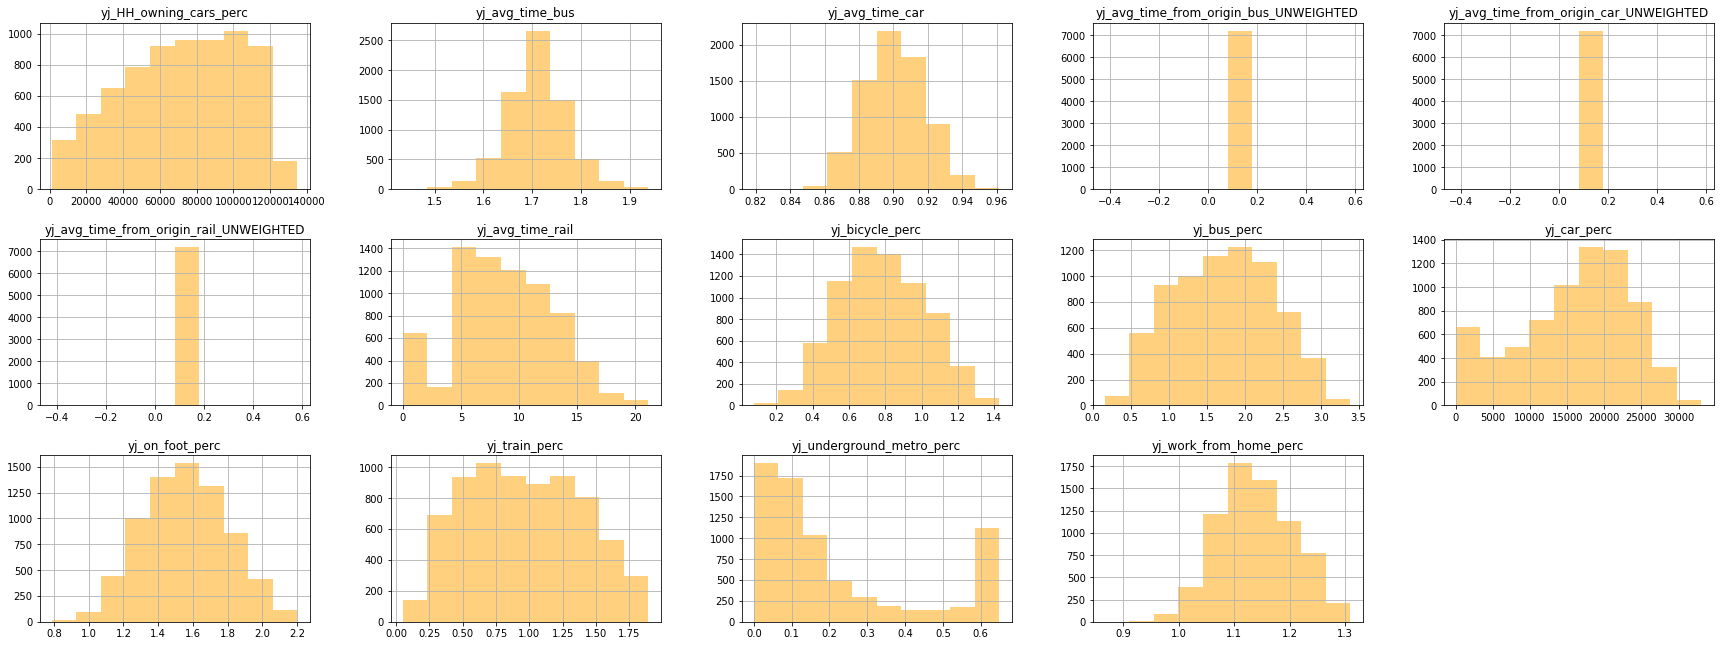

In [14]:
# plot
yj_transformed.hist(layout=(4, 5), figsize=(30, 15), color='orange', alpha=.5);

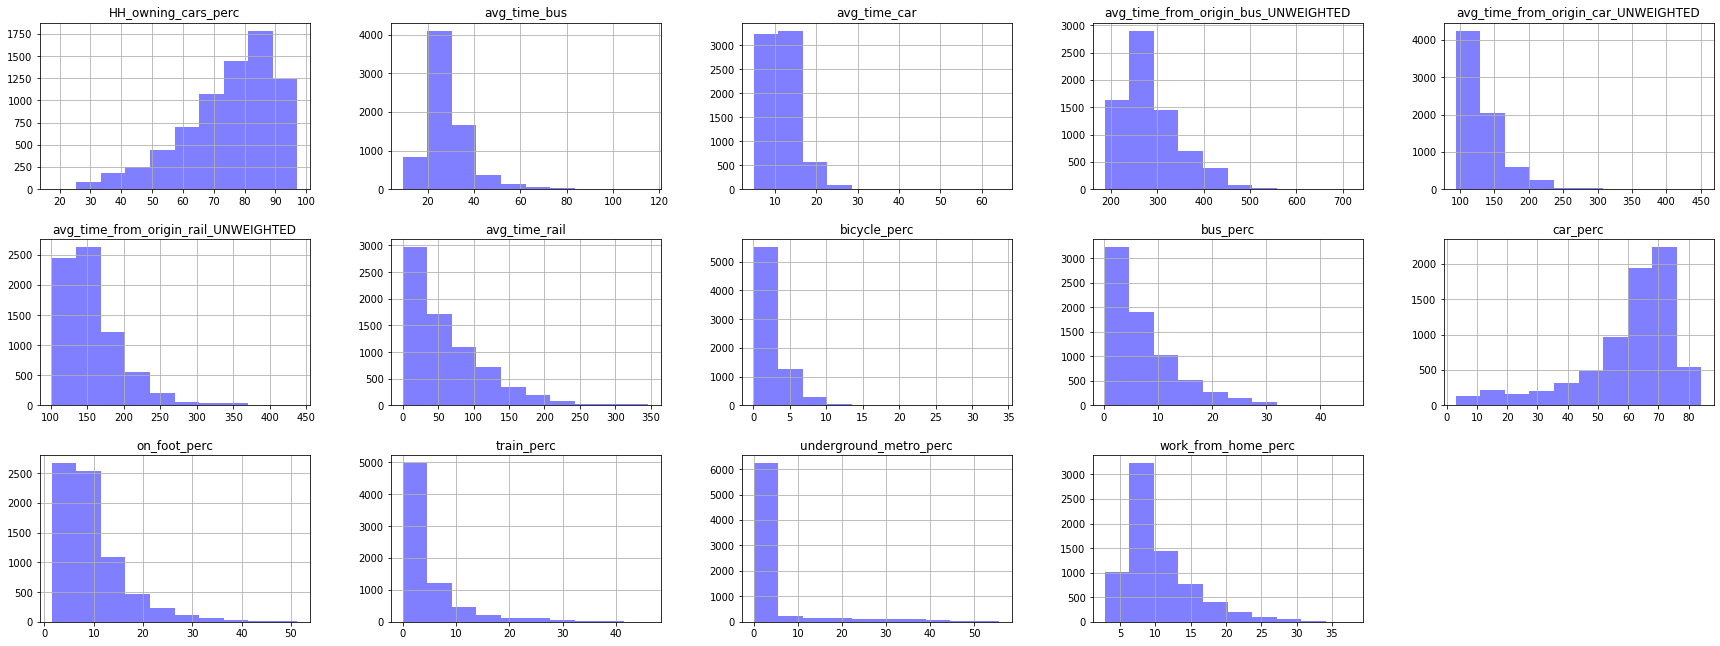

In [15]:
# compare to original 
numeric_cleaned.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

## Standardize

All variables need to be standardized. if they have different ranges then the ones with the larger ranges will dominate in the clustering

1. Range Standardization (https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)

In [16]:
#transform df to np array
x = yj_transformed.values 
# this is range standardization
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# transform to dataframe
range_standardized = pd.DataFrame(x_scaled, columns=yj_cols)
range_standardized

,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,0.032888,0.783250,0.991524,0.670468,0.497181,0.745066,0.977752,0.0,0.750314,0.0,0.384236,0.0,0.215071,0.000000
1,0.288099,0.462820,0.988767,0.752257,0.730330,0.429879,0.375330,0.0,0.517181,0.0,0.593986,0.0,0.317679,0.228913
2,0.380084,0.497672,0.984273,0.897682,0.651366,0.330285,0.451155,0.0,0.480607,0.0,0.597340,0.0,0.317312,0.168707
3,0.503477,0.460364,0.977438,0.842178,0.636263,0.430084,0.493507,0.0,0.505355,0.0,0.518073,0.0,0.303005,0.262828
4,0.338828,0.454186,0.983510,0.823848,0.735873,0.474129,0.430515,0.0,0.452000,0.0,0.563461,0.0,0.309232,0.209627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.553070,0.567380,0.031798,0.352079,0.386904,0.593087,0.598651,0.0,0.540167,0.0,0.399212,0.0,0.767643,0.698007
7197,0.802106,0.753930,0.192388,0.262482,0.398055,0.460536,0.325501,0.0,0.693727,0.0,0.504453,0.0,0.660819,0.757139
7198,0.789954,0.918745,0.145435,0.121925,0.257658,0.356388,0.324922,0.0,0.806439,0.0,0.690984,0.0,0.825792,0.561430
7199,0.632313,0.436186,0.091456,0.651616,0.583752,0.657960,0.782914,0.0,0.644499,0.0,0.367349,0.0,0.714844,0.382336


In [17]:
# Add the MSOA name column

# extract MSOA codes from initial 'cleaned' dataframe
MSOA_name = cleaned[['MSOA']]
MSOA_name

# concatenate/merge
range_st =pd.concat([MSOA_name, range_standardized], axis='columns')
range_st.head()

,MSOA,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,E02000001,0.032888,0.783250,0.991524,0.670468,0.497181,0.745066,0.977752,0.0,0.750314,0.0,0.384236,0.0,0.215071,0.000000
1,E02000002,0.288099,0.462820,0.988767,0.752257,0.730330,0.429879,0.375330,0.0,0.517181,0.0,0.593986,0.0,0.317679,0.228913
2,E02000003,0.380084,0.497672,0.984273,0.897682,0.651366,0.330285,0.451155,0.0,0.480607,0.0,0.597340,0.0,0.317312,0.168707
3,E02000004,0.503477,0.460364,0.977438,0.842178,0.636263,0.430084,0.493507,0.0,0.505355,0.0,0.518073,0.0,0.303005,0.262828
4,E02000005,0.338828,0.454186,0.983510,0.823848,0.735873,0.474129,0.430515,0.0,0.452000,0.0,0.563461,0.0,0.309232,0.209627


In [18]:
#save to csv
range_st.to_csv('Data/yeojohnson_range_st.csv')

2. Z-score standardization (https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns)

In [19]:
from scipy.stats import zscore
zscore = yj_transformed.apply(zscore)
zscore

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,-2.078686,1.094545,1.965725,0.756826,0.058967,1.275285,2.541451,NaN,1.481788,NaN,-1.337881,NaN,-0.941110,-2.112126
1,-1.009171,-1.009040,1.957405,1.108707,1.222531,-0.534930,-0.984309,NaN,-0.456789,NaN,0.386653,NaN,-0.443501,-1.111678
2,-0.623687,-0.780242,1.943847,1.734370,0.828451,-1.106924,-0.540533,NaN,-0.760907,NaN,0.414225,NaN,-0.445279,-1.374803
3,-0.106580,-1.025167,1.923226,1.495577,0.753078,-0.533747,-0.292659,NaN,-0.555122,NaN,-0.237495,NaN,-0.514662,-0.963451
4,-0.796578,-1.065720,1.941546,1.416714,1.250196,-0.280787,-0.661333,NaN,-0.998789,NaN,0.135678,NaN,-0.484465,-1.195965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.101249,-0.322619,-0.929960,-0.612976,-0.491386,0.402422,0.322708,NaN,-0.265651,NaN,-1.214749,NaN,1.738647,0.938470
7197,1.144891,0.902061,-0.445428,-0.998451,-0.435735,-0.358857,-1.275943,NaN,1.011251,NaN,-0.349478,NaN,1.220594,1.196903
7198,1.093962,1.984056,-0.587092,-1.603167,-1.136411,-0.957006,-1.279329,NaN,1.948483,NaN,1.184156,NaN,2.020649,0.341567
7199,0.433334,-1.183888,-0.749961,0.675719,0.491015,0.775006,1.401139,NaN,0.601903,NaN,-1.476719,NaN,1.482596,-0.441150


In [20]:
# concatenate/merge MSOA 
zscore_st = pd.concat([MSOA_name, zscore], axis='columns')
zscore_st.head()

,MSOA,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,E02000001,-2.078686,1.094545,1.965725,0.756826,0.058967,1.275285,2.541451,NaN,1.481788,NaN,-1.337881,NaN,-0.941110,-2.112126
1,E02000002,-1.009171,-1.009040,1.957405,1.108707,1.222531,-0.534930,-0.984309,NaN,-0.456789,NaN,0.386653,NaN,-0.443501,-1.111678
2,E02000003,-0.623687,-0.780242,1.943847,1.734370,0.828451,-1.106924,-0.540533,NaN,-0.760907,NaN,0.414225,NaN,-0.445279,-1.374803
3,E02000004,-0.106580,-1.025167,1.923226,1.495577,0.753078,-0.533747,-0.292659,NaN,-0.555122,NaN,-0.237495,NaN,-0.514662,-0.963451
4,E02000005,-0.796578,-1.065720,1.941546,1.416714,1.250196,-0.280787,-0.661333,NaN,-0.998789,NaN,0.135678,NaN,-0.484465,-1.195965


In [21]:
#save to csv
zscore_st.to_csv('Data/yeojohnson_zscore_st.csv')

3. Interdecile Range Standardization

We subtract the median then divided by the distance between the 90th percentile, and the 10th percentile.

"Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results."

In [22]:
from sklearn.preprocessing import RobustScaler

# we change the range because the default is iqr (0.25 - 0.75)
idr = RobustScaler(quantile_range = (0.1,0.9))

# Transform the 'yj_transformed' df
idr_mat = idr.fit_transform(yj_transformed.values)
idr_mat

array([[-2.42730882e+01,  1.96394611e+00,  5.14207768e-01, ...,
         0.00000000e+00, -3.98899411e+00, -2.04188301e+02],
       [-1.21712022e+01, -1.61735102e+00,  5.12418341e-01, ...,
         0.00000000e+00, -1.82346168e+00, -1.14929407e+02],
       [-7.80933008e+00, -1.22782728e+00,  5.09502235e-01, ...,
         0.00000000e+00, -1.83119749e+00, -1.38405143e+02],
       ...,
       [ 1.16263928e+01,  3.47831562e+00, -3.48561625e-02, ...,
         0.00000000e+00,  8.90023314e+00,  1.47275385e+01],
       [ 4.15119012e+00, -1.91502430e+00, -6.98861174e-02, ...,
         0.00000000e+00,  6.55868948e+00, -5.51056397e+01],
       [-1.19971120e+01, -1.79332628e+00,  5.02727497e-02, ...,
         0.00000000e+00,  2.82669491e+00, -1.17027592e+02]])

In [23]:
# transform to a df
idr_scaled = pd.DataFrame(idr_mat, columns=yj_cols)
idr_scaled

,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,-24.273088,1.963946,0.514208,3.535595,0.156851,2.430043,4.454445,0.0,1.652639,0.0,-1.343863,0.0,-3.988994,-204.188301
1,-12.171202,-1.617351,0.512418,5.085569,5.559558,-0.925033,-1.706932,0.0,-0.475142,0.0,0.383489,0.0,-1.823462,-114.929407
2,-7.809330,-1.227827,0.509502,7.841506,3.729747,-1.985175,-0.931420,0.0,-0.808943,0.0,0.411106,0.0,-1.831197,-138.405143
3,-1.958111,-1.644807,0.505067,6.789664,3.379774,-0.922841,-0.498251,0.0,-0.583073,0.0,-0.241679,0.0,-2.133142,-101.704785
4,-9.765640,-1.713847,0.509007,6.442286,5.688011,-0.454003,-1.142521,0.0,-1.070042,0.0,0.132104,0.0,-2.001730,-122.449438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.393545,-0.448736,-0.108601,-2.498143,-2.398570,0.812267,0.577121,0.0,-0.265349,0.0,-1.220530,0.0,7.672993,67.982532
7197,12.202673,1.636247,-0.004387,-4.196091,-2.140170,-0.598697,-2.216571,0.0,1.136178,0.0,-0.353845,0.0,5.418485,91.039694
7198,11.626393,3.478316,-0.034856,-6.859761,-5.393578,-1.707315,-2.222488,0.0,2.164884,0.0,1.182296,0.0,8.900233,14.727538
7199,4.151190,-1.915024,-0.069886,3.178333,2.162951,1.502818,2.461713,0.0,0.686878,0.0,-1.482929,0.0,6.558689,-55.105640


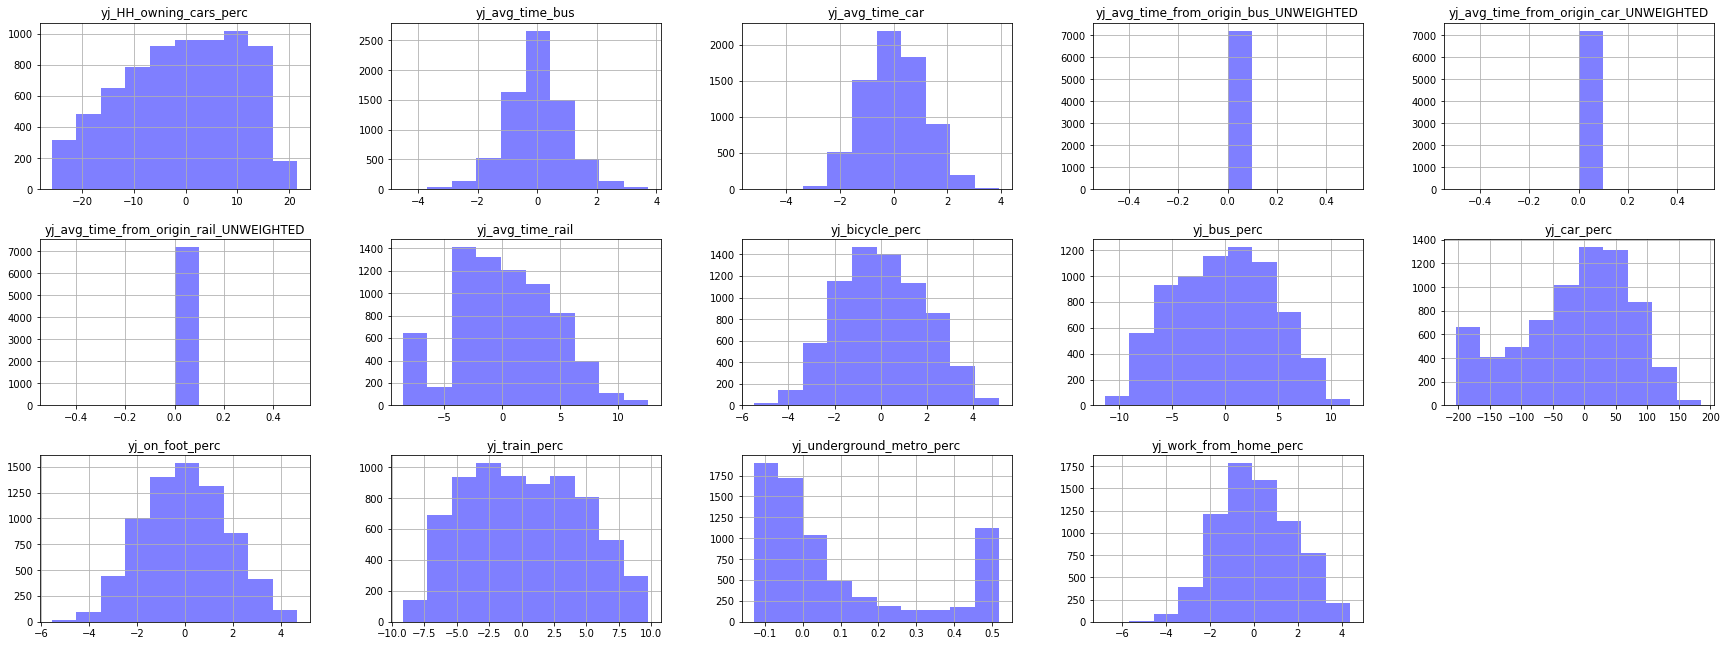

In [24]:
# plot to check the ranges
idr_scaled.hist(layout=(4, 5), figsize=(30, 15), color='blue', alpha=.5);

The ranges are different, so this might not be the best method for scaling

In [25]:
# concatenate/merge MSOA 
idr_st = pd.concat([MSOA_name, idr_scaled], axis='columns')
idr_st.head()

,MSOA,yj_HH_owning_cars_perc,yj_work_from_home_perc,yj_underground_metro_perc,yj_train_perc,yj_bus_perc,yj_bicycle_perc,yj_on_foot_perc,yj_avg_time_from_origin_car_UNWEIGHTED,yj_avg_time_car,yj_avg_time_from_origin_bus_UNWEIGHTED,yj_avg_time_bus,yj_avg_time_from_origin_rail_UNWEIGHTED,yj_avg_time_rail,yj_car_perc
0,E02000001,-24.273088,1.963946,0.514208,3.535595,0.156851,2.430043,4.454445,0.0,1.652639,0.0,-1.343863,0.0,-3.988994,-204.188301
1,E02000002,-12.171202,-1.617351,0.512418,5.085569,5.559558,-0.925033,-1.706932,0.0,-0.475142,0.0,0.383489,0.0,-1.823462,-114.929407
2,E02000003,-7.809330,-1.227827,0.509502,7.841506,3.729747,-1.985175,-0.931420,0.0,-0.808943,0.0,0.411106,0.0,-1.831197,-138.405143
3,E02000004,-1.958111,-1.644807,0.505067,6.789664,3.379774,-0.922841,-0.498251,0.0,-0.583073,0.0,-0.241679,0.0,-2.133142,-101.704785
4,E02000005,-9.765640,-1.713847,0.509007,6.442286,5.688011,-0.454003,-1.142521,0.0,-1.070042,0.0,0.132104,0.0,-2.001730,-122.449438


In [26]:
#save to csv
idr_st.to_csv('Data/yeojohnson_idr_st.csv')